In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


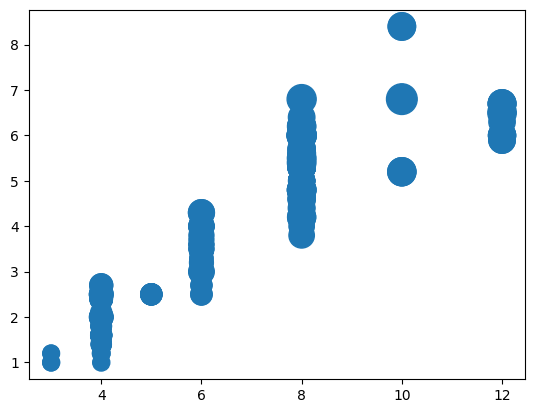

In [22]:
plt.scatter(df['CYLINDERS'], df['ENGINESIZE'], df['CO2EMISSIONS'])
# note that we can use max 3 variables for a scatter plot, x, y, size

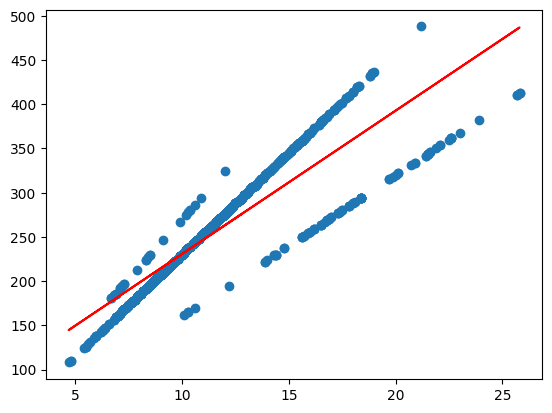

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['FUELCONSUMPTION_COMB']].values
# first, I try each predictor separately to see if there is a linear relationship with the target, then I'll use it in multiple LR model
# or better to get p value to be more accurate?
# I did ANOVA for the MAKE, check the file
y = df['CO2EMISSIONS'].values

simple_model = LinearRegression().fit(X, y)

plt.scatter(X, y)
plt.plot(X, simple_model.predict(X), 'r')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# we have to separate the continues and categorical predictor variables
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
X_cat = df[['MAKE', 'VEHICLECLASS']]

y = df['CO2EMISSIONS'].values

# to add the MAKE:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
X = pd.concat([X, X_cat_encoded], axis=1)
X = X.values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mult_model = LinearRegression().fit(X_train, y_train)

y_pred = mult_model.predict(X_test)
MSE = round(mean_squared_error(y_test, y_pred), 2)
RMSE = round(np.sqrt(MSE), 2)
R2 = round(r2_score(y_test, y_pred), 2)
print('MSE/var:', MSE/np.var(y), '\n'
      'RMSE:', RMSE, '|', 'Range:', min(y), '-', max(y), '\n'
      'R2:', R2)


# how to check an example with this model?

MSE/var: 0.09876416806268469 
RMSE: 19.91 | Range: 108 - 488 
R2: 0.9
